In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

pd.set_option('display.max_rows', 500)

from scipy.optimize import curve_fit

In [90]:
!rm ccaa*csv

In [91]:
!wget https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_casos.csv
!wget https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_hospitalizados.csv
!wget https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_fallecidos.csv
!wget https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_uci.csv
!wget https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_altas.csv

--2020-03-29 17:19:36--  https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_casos.csv
Resolving raw.githubusercontent.com... 151.101.132.133
Connecting to raw.githubusercontent.com|151.101.132.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2834 (2.8K) [text/plain]
Saving to: ‘ccaa_covid19_casos.csv’

ccaa_covid19_casos. 100%[===================>]   2.77K  --.-KB/s    in 0s      

2020-03-29 17:19:37 (12.9 MB/s) - ‘ccaa_covid19_casos.csv’ saved [2834/2834]

--2020-03-29 17:19:37--  https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_hospitalizados.csv
Resolving raw.githubusercontent.com... 151.101.132.133
Connecting to raw.githubusercontent.com|151.101.132.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1131 (1.1K) [text/plain]
Saving to: ‘ccaa_covid19_hospitalizados.csv’

ccaa_covid19_hospit 100%[===================>]   1.10K  --.-KB/s    in 0s      

2020-03-29

In [92]:
data_c = pd.read_csv('ccaa_covid19_casos.csv')
data_h = pd.read_csv('ccaa_covid19_hospitalizados.csv')
data_f = pd.read_csv('ccaa_covid19_fallecidos.csv')
data_u = pd.read_csv('ccaa_covid19_uci.csv')
data_a = pd.read_csv('ccaa_covid19_altas.csv')

In [61]:
data_c.head(20)

,cod_ine,CCAA,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,...,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28
0,1,Andalucía,1,6,8,12,12,13,13,12,...,1008,1287,1515,1725,1961,2471,3010,3406,3793,4277
1,2,Aragón,0,1,1,0,0,0,0,1,...,281,360,424,532,638,758,907,1116,1338,1592
2,3,Asturias,0,0,0,1,1,1,2,5,...,292,344,486,545,594,662,779,841,900,1004
3,4,Baleares,1,1,2,2,2,2,5,6,...,169,203,246,331,400,478,562,660,755,862
4,5,Canarias,6,6,6,7,7,7,7,8,...,220,287,348,414,481,557,657,784,878,1025
5,6,Cantabria,0,0,0,1,10,10,10,10,...,83,144,215,282,347,425,510,671,810,937
6,8,Castilla-La Mancha,0,0,0,1,3,7,12,13,...,801,1044,1423,1819,2078,2465,2780,3383,3934,4512
7,7,Castilla y León,0,2,2,3,3,8,11,11,...,868,1147,1466,1744,2055,2460,2940,3488,4132,4791
8,9,Cataluña,2,3,5,6,15,15,15,24,...,2702,3270,4203,4704,5925,7864,9937,11592,12940,14263
9,18,Ceuta,0,0,0,0,0,0,0,0,...,1,5,5,5,6,6,9,10,17,17


In [33]:
def func_exp(x, a, c, d):# = 0):#, d):
    return a*np.exp(-c*x)+d

def func_exp_2(x, x0, a, c):# = 0):#, d):
    return a*np.exp(c*(x-x0))

def func_line(x,m,b):
    return m*x + b

In [ ]:
#Preliminaries

In [8]:
dp_c = data_c[data_c['CCAA'] == 'Cataluña']
dp_h = data_h[data_h['CCAA'] == 'Cataluña']

Date range: 2020-02-28 2020-03-03
Doubling time for new cases:  1.627 days; r2 score 0.878
Doubling time for new cases, chunk 0 :  1.627 days
Date range: 2020-03-04 2020-03-08
Doubling time for new cases:  2.597 days; r2 score 0.787
Doubling time for new cases, chunk 1 :  2.597 days
Date range: 2020-03-09 2020-03-13
Doubling time for new cases:  1.861 days; r2 score 0.963
Doubling time for new cases, chunk 2 :  1.861 days
Date range: 2020-03-14 2020-03-18
Doubling time for new cases:  2.13 days; r2 score 0.994
Doubling time for new cases, chunk 3 :  2.13 days
Date range: 2020-03-19 2020-03-23
Doubling time for new cases:  3.549 days; r2 score 0.989
Doubling time for new cases, chunk 4 :  3.549 days
Date range: 2020-03-24 2020-03-28
Doubling time for new cases:  4.366 days; r2 score 0.938
Doubling time for new cases, chunk 5 :  4.366 days


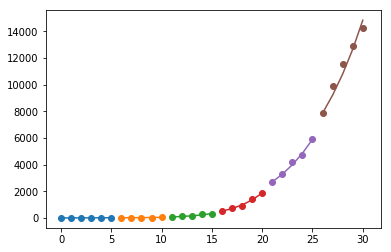

In [57]:
nchunks = 6

for i in range(nchunks):

        cases = np.array_split(dp.values[0,2:].astype('float'), nchunks)[i]
        days = np.array_split(range(len(dp.values[0,2:])), nchunks)[i]
        
        #   Fix n_0 at initial value for each time chunk
        popt, pcov = curve_fit(lambda x, c: \
                               func_exp_2(x, days.min(), cases.min(), c) , days, cases, p0=(1e-2), maxfev = 10000)
        
        print('Date range:', np.min(np.array_split(dp.columns[3:].values, nchunks)[i]), \
              np.max(np.array_split(dp.columns[3:].values, nchunks)[i]))
    
        print('Doubling time: ', np.round(np.log(2)/popt[0], 3), 'days;', \
              'r2 score', np.round(r2_score(cases, func_exp_2(days, days.min(), cases.min(), *popt)), 3))

        plt.scatter(days, cases)
        
        plt.plot(days, func_exp_2(days, days.min(), cases.min(), *popt))
        
        print('Doubling time for new cases, chunk', i,': ', np.round(np.log(2)/popt[0], 3), 'days')


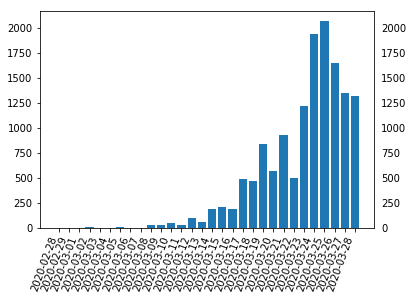

In [55]:
daily_cases =  dp.values [0,3:] - dp.values[0,2:len(dp.values)-2]
dailies =  dp.values [0,3:] - dp.values[0,2:len(dp.values)-2]


plt.bar(dp.columns[3:].values, dailies)
plt.setp(plt.gca().xaxis.get_majorticklabels(),
         'rotation', 70, 'ha', 'right');
plt.tick_params(axis='y', which='both', labelleft=True, labelright=True)

In [96]:
dh = data_h[data_h['CCAA'] == 'Cataluña']

In [138]:
def analyze_comunidad(name, datac, datah, dataf, datau, dataa, nchunks = 5, dailies = True, save = False):
    
    dp = datac[datac['CCAA'] == name]
    
    dh = datah[datah['CCAA'] == name]
    
    df = dataf[dataf['CCAA'] == name]
    
    du = datau[datau['CCAA'] == name]
        
    da = dataa[dataa['CCAA'] == name]
        
    #plot cases
    
    #plt.figure(figsize=(14,7))
    plt.title('Statistics, Comunidad: '+str(name), fontsize = 14)
    plt.title('Statistics, España', fontsize = 14)
    plt.plot(dp.columns[2:].values, dp.values[0,2:], 'o-', label = 'Total new cases')
    plt.plot(dh.columns[2:].values, dh.values[0,2:], 'o-', label = 'Total hospitalized')
    plt.plot(da.columns[2:].values, da.values[0,2:],'o-', c = 'g', label = 'Total recovered')
    plt.plot(df.columns[2:].values, df.values[0,2:],'o-', c = 'k', label = 'Total deceased')
    plt.plot(du.columns[2:].values, du.values[0,2:],'o-', c = 'r', label = 'Total intensive care')

    ax=plt.gca()
    

    if (dailies):
        dailies =  dp.values [0,3:] - dp.values[0,2:len(dp.values)-2]
        plt.bar(dp.columns[3:].values, dailies, alpha = 0.5, label = 'New daily cases')
       
        ax=plt.gca()
        
        for i in range(len(dailies)):

            ax.annotate(str(dailies[i]), (i+0.7, dailies[i]*1.1), clip_on = True)# + 0.1*np.log(dailies[i])))
        
    plt.yscale('log')
    plt.setp(plt.gca().xaxis.get_majorticklabels(),
         'rotation', 70, 'ha', 'right');
    plt.tick_params(axis='y', which='both', labelleft=True, labelright=True)

    plt.ylim(1, np.max(dp.values[0,2:].astype('float')) * 3)
    
    ax=plt.gca()
    
    # fit different time periods
    
    for i in range(nchunks):
        
        cases = np.array_split(dp.values[0,2:].astype('float'), nchunks)[i]
        days = np.array_split(range(len(dp.values[0,2:])), nchunks)[i]
        
        #   Fix n_0 at initial value for each time chunk
        popt, pcov = curve_fit(lambda x, c: \
                               func_exp_2(x, days.min(), cases.min(), c) , days, cases, p0=(1e-2), maxfev = 10000)
        
        print('Date range:', np.min(np.array_split(dp.columns[3:].values, nchunks)[i]), \
              np.max(np.array_split(dp.columns[3:].values, nchunks)[i]))
    
        print('Doubling time: ', np.round(np.log(2)/popt[0], 3), 'days;', \
              'r2 score', np.round(r2_score(cases, func_exp_2(days, days.min(), cases.min(), *popt)), 3))

        plt.scatter(days, cases)
        
        #Plots the different segments
        #plt.plot(days, func_exp_2(days, days.min(), cases.min(), *popt))
        
        print('Doubling time for new cases, chunk', i,': ', np.round(np.log(2)/popt[0], 3), 'days')

        ax.annotate('',
            xy=(min(days)-.5, np.max(dp.values[0,2:].astype('float'))*1.1), xycoords='data',
            xytext=(max(days)+0.5, np.max(dp.values[0,2:].astype('float'))*1.1), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3", color='r', lw=2), clip_on=True)
        ax.annotate('DT (days): '+str(np.round(np.log(2)/popt[0], 2)), \
                                       (min(days)+0.5, np.max(dp.values[0,2:].astype('float'))*1.5), clip_on = True, fontsize=12)
    plt.legend(loc = (0.02, 0.5), fontsize = 12)
    
    if(save):
        plt.savefig('Data_'+datac.columns[-1]+'_'+name+'.png', dpi = 300)
     
        

Date range: 2020-02-28 2020-03-04
Doubling time:  1.627 days; r2 score 0.878
Doubling time for new cases, chunk 0 :  1.627 days
Date range: 2020-03-05 2020-03-09
Doubling time:  2.269 days; r2 score 0.903
Doubling time for new cases, chunk 1 :  2.269 days
Date range: 2020-03-10 2020-03-14
Doubling time:  2.009 days; r2 score 0.98
Doubling time for new cases, chunk 2 :  2.009 days
Date range: 2020-03-15 2020-03-19
Doubling time:  2.106 days; r2 score 0.995
Doubling time for new cases, chunk 3 :  2.106 days
Date range: 2020-03-20 2020-03-24
Doubling time:  3.269 days; r2 score 0.982
Doubling time for new cases, chunk 4 :  3.269 days
Date range: 2020-03-25 2020-03-29
Doubling time:  6.188 days; r2 score 0.947
Doubling time for new cases, chunk 5 :  6.188 days


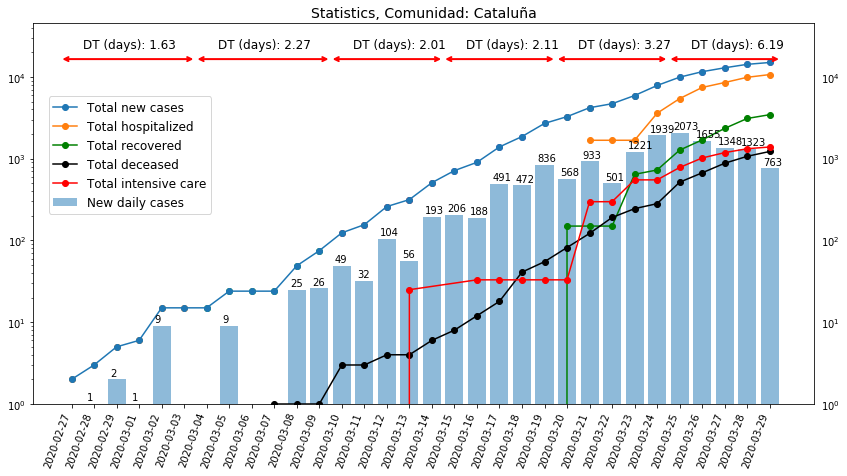

In [136]:
analyze_comunidad('Cataluña', data_c, data_h, data_f, data_u, data_a, nchunks=6, save = True)

Date range: 2020-02-28 2020-03-04
Doubling time:  1.405 days; r2 score 0.956
Doubling time for new cases, chunk 0 :  1.405 days
Date range: 2020-03-05 2020-03-09
Doubling time:  1.958 days; r2 score 0.888
Doubling time for new cases, chunk 1 :  1.958 days
Date range: 2020-03-10 2020-03-14
Doubling time:  2.136 days; r2 score 0.991
Doubling time for new cases, chunk 2 :  2.136 days
Date range: 2020-03-15 2020-03-19
Doubling time:  4.335 days; r2 score 0.998
Doubling time for new cases, chunk 3 :  4.335 days
Date range: 2020-03-20 2020-03-24
Doubling time:  5.046 days; r2 score 0.958
Doubling time for new cases, chunk 4 :  5.046 days
Date range: 2020-03-25 2020-03-29
Doubling time:  5.814 days; r2 score 0.95
Doubling time for new cases, chunk 5 :  5.814 days


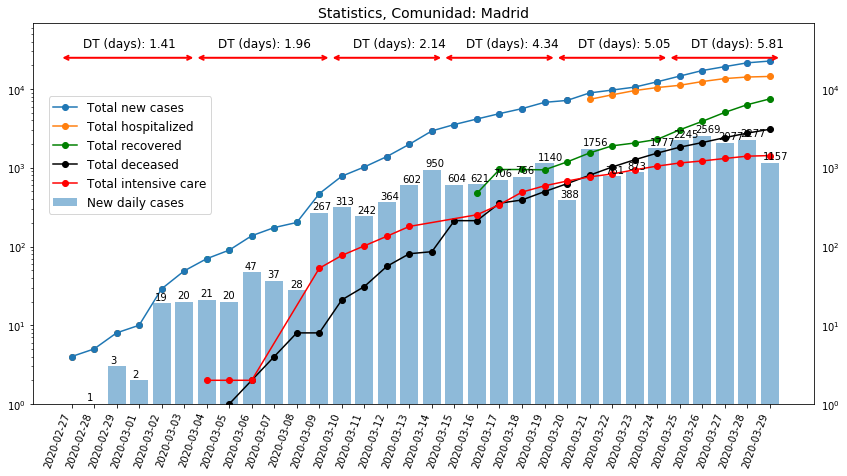

In [137]:
analyze_comunidad('Madrid', data_c, data_h, data_f, data_u, data_a, nchunks=6, save = True)

Date range: 2020-02-28 2020-03-04
Doubling time:  1.512 days; r2 score 0.975
Doubling time for new cases, chunk 0 :  1.512 days
Date range: 2020-03-05 2020-03-09
Doubling time:  2.252 days; r2 score 0.955
Doubling time for new cases, chunk 1 :  2.252 days
Date range: 2020-03-10 2020-03-14
Doubling time:  2.196 days; r2 score 0.998
Doubling time for new cases, chunk 2 :  2.196 days
Date range: 2020-03-15 2020-03-19
Doubling time:  3.557 days; r2 score 0.996
Doubling time for new cases, chunk 3 :  3.557 days
Date range: 2020-03-20 2020-03-24
Doubling time:  4.031 days; r2 score 0.992
Doubling time for new cases, chunk 4 :  4.031 days
Date range: 2020-03-25 2020-03-29
Doubling time:  5.238 days; r2 score 0.978
Doubling time for new cases, chunk 5 :  5.238 days


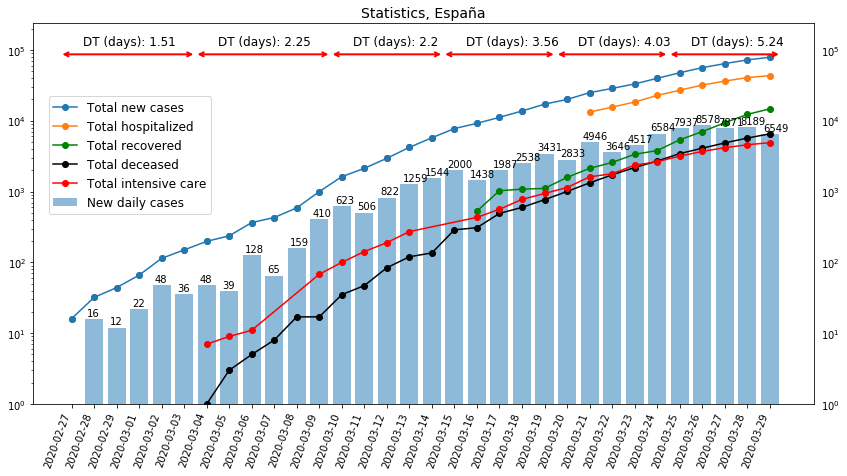

In [139]:
analyze_comunidad('Total', data_c, data_h, data_f, data_u, data_a, nchunks=6, save = True)